<a href="https://colab.research.google.com/github/yasmine-sassi/Titanic-Death-Prediction/blob/main/Titanic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install bayesian-optimization

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler,\
PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.utils.class_weight import compute_class_weight

from sklearn.metrics import accuracy_score, confusion_matrix, \
classification_report, log_loss, f1_score, recall_score,\
mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor

from imblearn.over_sampling import SMOTE
from bayes_opt import BayesianOptimization


In [3]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


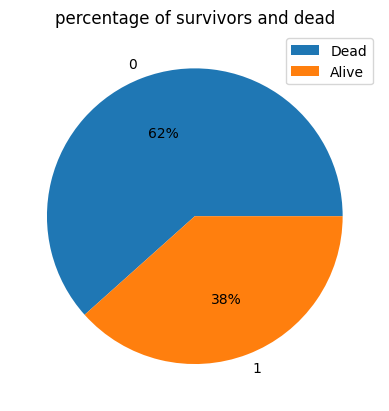

In [ ]:
plt.pie(df['Survived'].value_counts().values, labels=df['Survived'].value_counts().keys(), autopct='%.0f%%')
plt.title('percentage of survivors and dead')
plt.legend(['Dead','Alive'])
plt.show()

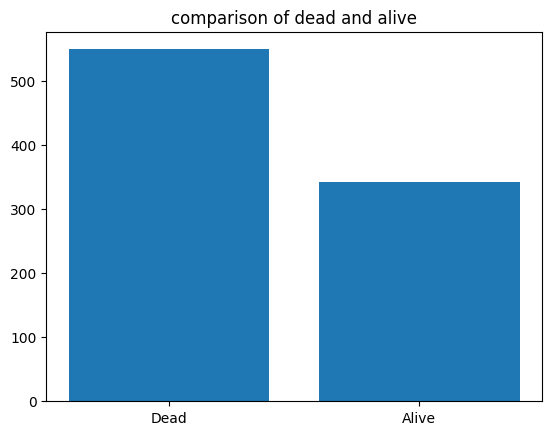

In [ ]:
plt.bar(height=df['Survived'].value_counts().values,x=['Dead','Alive'])
plt.title("comparison of dead and alive")
plt.show()

In [ ]:
print(df['Survived'].value_counts().keys())

Index([0, 1], dtype='int64', name='Survived')


In [ ]:
df.drop(columns=['PassengerId','Pclass','SibSp','Parch','Survived']).corr(numeric_only=True)

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


In [ ]:
df["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [ ]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [ ]:
df["Pclass"].unique()

array([3, 1, 2])

In [ ]:
df["Pclass"].nunique()

3

In [ ]:
pd.crosstab([df['Pclass'],df['Sex']], df['Survived'], dropna=False,normalize='index')

Survived              0         1
Pclass Sex                       
1      female  0.031915  0.968085
       male    0.631148  0.368852
2      female  0.078947  0.921053
       male    0.842593  0.157407
3      female  0.500000  0.500000
       male    0.864553  0.135447

In [ ]:
pd.crosstab([df['Pclass'],df['Sex']], df['Survived'], dropna=False,normalize='columns')

Survived              0         1
Pclass Sex                       
1      female  0.005464  0.266082
       male    0.140255  0.131579
2      female  0.010929  0.204678
       male    0.165756  0.049708
3      female  0.131148  0.210526
       male    0.546448  0.137427

In [ ]:
pd.crosstab([df['Pclass'],df['Sex']], df['Survived'], dropna=False)

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

In [ ]:
pd.crosstab([df['Pclass'],df['Sex']], df['Survived'], dropna=False,normalize=True)*100

Survived               0          1
Pclass Sex                         
1      female   0.336700  10.213244
       male     8.641975   5.050505
2      female   0.673401   7.856341
       male    10.213244   1.907969
3      female   8.080808   8.080808
       male    33.670034   5.274972

In [ ]:
Survivedparclass=df.groupby(['Survived'])[['Pclass','Survived']].value_counts().to_frame().reset_index()

In [ ]:
survived_par_class=Survivedparclass=df.groupby(['Survived'])[['Pclass','Survived']].value_counts().to_frame().reset_index()

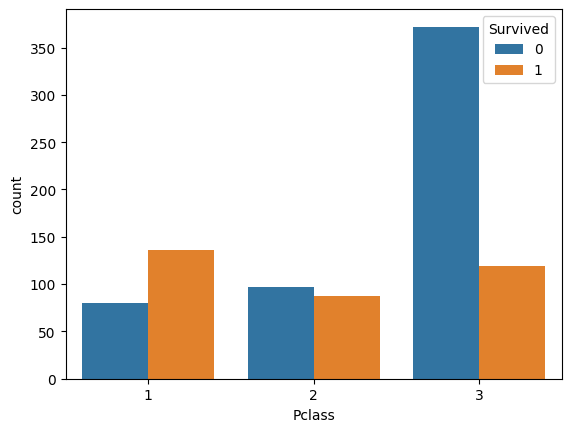

In [ ]:
sns.barplot(data=survived_par_class,x='Pclass',y='count',hue='Survived')
plt.show()

In [ ]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
df['Name']=df['Name'].str.split(', ').str[1].str.split('.').str[0]

In [ ]:
df['Name'].value_counts()

Name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [ ]:
pd.crosstab(df['Name'],df['Pclass'])

Pclass,1,2,3
Name,,,
Capt,1,0,0
Col,2,0,0
Don,1,0,0
Dr,5,2,0
Jonkheer,1,0,0
Lady,1,0,0
Major,2,0,0
Master,3,9,28
Miss,46,34,102


In [ ]:
df['Name'].value_counts()

Name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

<ipython-input-29-d8a28bfbbea2>:1: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.histplot(data=df,x='Age',y='Fare',hue='Pclass', palette=sns.color_palette("Paired"), multiple="stack", bins=80)


<Axes: xlabel='Age', ylabel='Fare'>

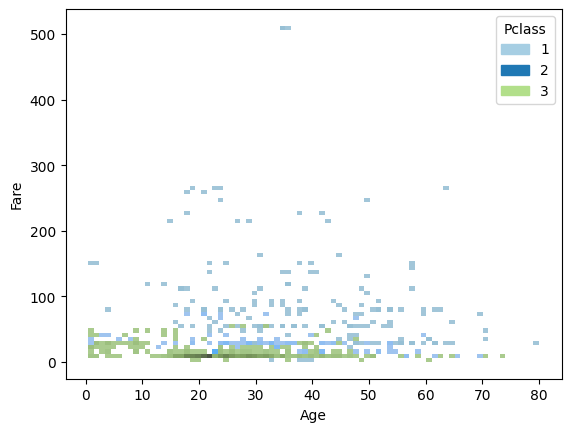

In [ ]:
sns.histplot(data=df,x='Age',y='Fare',hue='Pclass', palette=sns.color_palette("Paired"), multiple="stack", bins=80)


In [ ]:
df.loc[df['Fare']==227.5250	]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
380,381,1,1,Miss,female,42.0,0,0,PC 17757,227.525,NaN,C
557,558,0,1,Mr,male,NaN,0,0,PC 17757,227.525,NaN,C
700,701,1,1,Mrs,female,18.0,1,0,PC 17757,227.525,C62 C64,C
716,717,1,1,Miss,female,38.0,0,0,PC 17757,227.525,C45,C


In [ ]:
'C62 C64 C45'

'C62 C64 C45'

In [ ]:
df.loc[df['Name'].str.contains('Cardeza')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
def Fill_Nan_ticket(df_ticket:pd.DataFrame)->pd.DataFrame:
  """
  this function creates 2 new columns that contains the level and the position
  of the passengers
  """
  # creating the level of the passenger
  df_ticket['level']='unknown'
  # creating the position of the passenger
  df_ticket['position']=0
  # now calucalting the passengers that have cabins
  if not df_ticket['Cabin'].isna().all():
    # collecting the list of cabins
    cabins=" ".join(df_ticket.loc[df_ticket['Cabin'].notna(),'Cabin'].values)
    # retrieving the first cabin that occurs
    df_ticket['level']=cabins[0]
    # retrieving the number of cabins
    cabin_positions=[int(x[1:]) if len(x)>1 else 0 for x in cabins.split(' ')]
    # then finally we determine the position of the cabins based on their number
    df_ticket['position']=(sum(cabin_positions)/len(cabin_positions))//33+1
  return df_ticket

In [ ]:
df=df.groupby(['Ticket'], as_index=False, group_keys=False).apply(Fill_Nan_ticket)

In [ ]:
pd.set_option('display.max_rows', 50)

In [ ]:
df.drop(columns=['Cabin', 'Ticket'], inplace=True)

In [ ]:
df.loc[(df['Age'].isna())&(df['Parch']==0), 'Age'] = np.random.choice(range(18, 28), size=df.loc[(df['Age'].isna())&(df['Parch']==0)].shape[0])

In [ ]:
df.loc[(df['Age']<15)&(df['Sex']=='male')]['Survived'].value_counts()

Survived
1    21
0    18
Name: count, dtype: int64

In [ ]:
df.loc[(df['Age'].isna()), 'Age'] = df['Age'].median()

In [ ]:
df.loc[df['Embarked'].isna(), 'Embarked']='C'

In [ ]:
df['Name'].value_counts()

Name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [ ]:
df.loc[~df['Name'].isin(['Mr','Miss','Mrs']),['Name']]='others'

In [ ]:
pd.crosstab(df['Name'],df['Survived'])

Survived,0,1
Name,,
Miss,55,127
Mr,436,81
Mrs,26,99
others,32,35


In [ ]:
df['Name'].value_counts()

Name
Mr        517
Miss      182
Mrs       125
others     67
Name: count, dtype: int64

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,level,position
0,1,0,3,Mr,male,22.0,1,0,7.2500,S,unknown,0.0
1,2,1,1,Mrs,female,38.0,1,0,71.2833,C,C,3.0
2,3,1,3,Miss,female,26.0,0,0,7.9250,S,unknown,0.0
3,4,1,1,Mrs,female,35.0,1,0,53.1000,S,C,4.0
4,5,0,3,Mr,male,35.0,0,0,8.0500,S,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,others,male,27.0,0,0,13.0000,S,unknown,0.0
887,888,1,1,Miss,female,19.0,0,0,30.0000,S,B,2.0
888,889,0,3,Miss,female,26.0,1,2,23.4500,S,unknown,0.0
889,890,1,1,Mr,male,26.0,0,0,30.0000,C,C,5.0


In [ ]:
df.drop(columns=['PassengerId'], inplace=True)

In [ ]:
df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,level,position
0,0,3,Mr,male,22.0,1,0,7.2500,S,unknown,0.0
1,1,1,Mrs,female,38.0,1,0,71.2833,C,C,3.0
2,1,3,Miss,female,26.0,0,0,7.9250,S,unknown,0.0
3,1,1,Mrs,female,35.0,1,0,53.1000,S,C,4.0
4,0,3,Mr,male,35.0,0,0,8.0500,S,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,others,male,27.0,0,0,13.0000,S,unknown,0.0
887,1,1,Miss,female,19.0,0,0,30.0000,S,B,2.0
888,0,3,Miss,female,26.0,1,2,23.4500,S,unknown,0.0
889,1,1,Mr,male,26.0,0,0,30.0000,C,C,5.0


In [ ]:
label_encoder = LabelEncoder()
df['Pclass']= label_encoder.fit_transform(df['Pclass'])
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Embarked']= label_encoder.fit_transform(df['Embarked'])
df['Name']= label_encoder.fit_transform(df['Name'])
df['level']= label_encoder.fit_transform(df['level'])


In [ ]:
scaler=StandardScaler()
df_to_scale = df.copy()
df_to_scale.drop(columns='Survived', inplace=True)
scaler.fit(df_to_scale)
df_to_scale[df_to_scale.columns]=scaler.transform(df_to_scale[df_to_scale.columns])
df_to_scale['Survived']=df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_to_scale.drop(columns='Survived'), df_to_scale['Survived'], test_size=0.2, random_state=42,stratify=df_to_scale['Survived'])

In [ ]:
class_weight=compute_class_weight(class_weight="balanced", classes=np.unique(df['Survived']), y=df['Survived'])


In [ ]:
clf=SVC(C=7.0, kernel='linear', degree=4,class_weight={\
                np.unique(df['Survived'])[0]:class_weight[0],\
                np.unique(df['Survived'])[1]:class_weight[1]},probability=True)
clf.fit(X_train,y_train)

SVC(C=7.0, class_weight={0: 0.8114754098360656, 1: 1.3026315789473684},
    degree=4, kernel='linear', probability=True)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[89, 21],
       [19, 50]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       110
           1       0.70      0.72      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
def prediction(C, kernel, degree):
  """
  this function predicts values using bayesian optimization
  """
  clf_iteration = SVC(C=C,\
                                         kernel=kernels[int(kernel)],\
                                         degree=int(degree),\
                                         )
  clf_iteration.fit(X_train, y_train)
  y_pred_iteration = clf_iteration.predict(X_test)
  return recall_score(y_test, y_pred_iteration)

In [ ]:
# kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# pbounds = {'C':(1.0,100.0), 'kernel':(0,3), 'degree':(2,6)}
# # Create a BayesianOptimization optimizer,
# # and optimize the given black_box_function.
# optimizer = BayesianOptimization(f = prediction,
#                                  pbounds = pbounds, verbose = 2,
#                                  random_state = 4)
# optimizer.maximize(init_points = 40, n_iter = 20)
# print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

In [ ]:
# params that might be good:     C = 96.74     degree  = 4.189     kernel = 2.918

In [ ]:
model = SVC(C=96.74, kernel='sigmoid', probability = True)
model.fit(X_train, y_train)

SVC(C=96.74, kernel='sigmoid', probability=True)

In [ ]:
scaler=StandardScaler()
df_to_scale_regression = df.copy()
scaler.fit(df_to_scale_regression)
df_to_scale_regression[df_to_scale_regression.columns]=scaler.transform(\
              df_to_scale_regression[df_to_scale_regression.columns])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_to_scale_regression.drop(columns='Age'), df_to_scale_regression['Age'], test_size=0.2, random_state=42)

In [ ]:
def prediction(n_estimators,max_depth, min_samples_split, min_samples_leaf,max_features):
  """
  this function predicts values using bayesian optimization
  """
  clf_iteration = RandomForestRegressor(n_estimators=int(n_estimators),\
                                         max_depth=int(max_depth),\
                                         min_samples_split=int(min_samples_split),\
                                         min_samples_leaf=int(min_samples_leaf),\
                                         max_features=int(max_features))
  clf_iteration.fit(X_train, y_train)
  y_pred_iteration = clf_iteration.predict(X_test)
  return r2_score(y_test, y_pred_iteration)

In [ ]:
pbounds = {'n_estimators':(100, 600),'max_depth':(10,40), 'min_samples_split':(2, 30), \
              'min_samples_leaf':(3, 20), 'max_features':(5, 30)}
# Create a BayesianOptimization optimizer,
# and optimize the given black_box_function.
optimizer = BayesianOptimization(f = prediction,
                                 pbounds = pbounds, verbose = 2,
                                 random_state = 4)
optimizer.maximize(init_points = 5, n_iter = 80)
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.2865    | 39.01     | 18.68     | 19.54     | 22.01     | 448.9     |
| 2         | 0.2952    | 16.48     | 29.41     | 3.106     | 9.084     | 317.4     |
| 3         | 0.2869    | 33.38     | 9.942     | 17.67     | 29.54     | 181.9     |
| 4         | 0.3115    | 27.92     | 5.225     | 9.572     | 3.236     | 578.3     |
| 5         | 0.2843    | 23.08     | 28.72     | 16.37     | 26.26     | 186.6     |
| 6         | 0.2839    | 10.0      | 30.0      | 20.0      | 30.0      | 600.0     |
| 7         | 0.3041    | 27.98     | 5.0       | 9.499     | 2.407     | 579.1     |
| 8         | 0.3089    | 27.41     | 5.482     | 8.53      | 3.449     | 577.0     |
| 9         | 0.3039    | 28.26     | 5.629     | 10.83     | 5.446     | 577.3     |
| 10        | 0.3024    | 29.46     | 5.0       | 10.2

In [ ]:
rf = RandomForestRegressor(max_depth= 32, max_features= 5, min_samples_leaf= 5,\
                            min_samples_split= 9, n_estimators= 580)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=32, max_features=5, min_samples_leaf=5,
                      min_samples_split=9, n_estimators=580)

<Figure size 2000x1000 with 0 Axes>

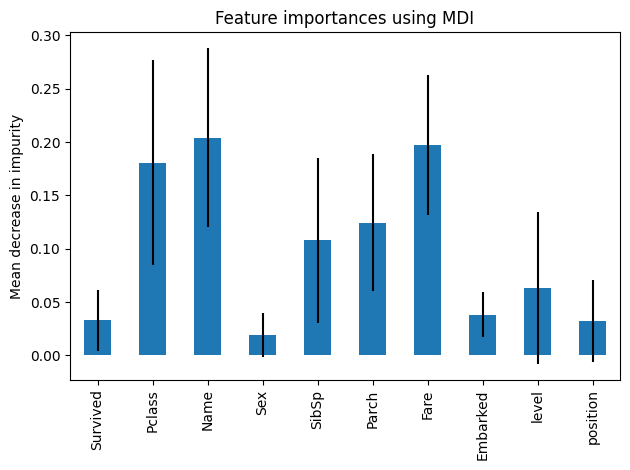

In [ ]:
plt.figure(figsize=(20,10))
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=df.drop(columns=\
 ['Age']).columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

123.70818968846034

In [ ]:
mean_absolute_error(y_test, y_pred)

8.427973353081539

In [ ]:
r2_score(y_test, y_pred)

0.3172678325240861

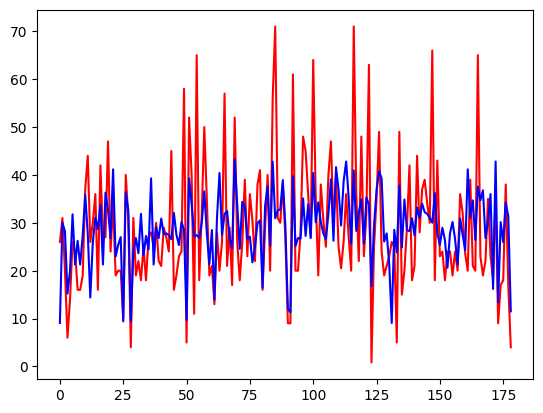

In [ ]:
plt.plot(np.arange(len(y_test)),y_test, color='red')
plt.plot(y_pred, color='blue')
plt.show()

709   -0.172071
439    0.202021
840   -0.620982
720   -1.668440
39    -1.069892
         ...   
433   -0.845437
773   -0.770619
25     0.725749
84    -0.845437
10    -1.818076
Name: Age, Length: 179, dtype: float64

In [ ]:
y_pred

array([-1.73113554,  0.27654681,  0.0053145 , -0.77524736, -0.70743742,
        0.07700437, -0.47112374, -0.06171345, -0.47112374, -0.13024394,
        0.39596347, -0.06405377, -0.34134328, -0.13165254,  0.22630764,
       -0.23325292,  0.24317474, -0.49997809,  1.16301092,  0.29732356,
       -0.10379163,  1.3034919 , -0.40093945, -0.22096772, -0.0877329 ,
       -1.26613024,  0.45326874,  0.34128995, -1.26613024, -0.61915252,
       -0.10379163,  0.13862607,  0.0740878 , -0.18853631, -0.10044798,
       -0.24973884,  1.36059213, -0.47112374,  0.11380629, -0.10379163,
        0.05013463, -0.53036775, -0.06405377,  0.04042323, -0.08185285,
        0.09780072, -0.10457636, -0.22096772,  0.04504431, -0.44730373,
       -2.0021261 ,  0.96030547,  0.77935579, -0.92878947,  0.04042323,
       -0.26068468,  0.27654681,  0.62917737, -0.21492593, -0.476128  ,
        0.04372007, -1.34653358,  0.21309286,  1.00003452,  0.04042323,
        0.08377445, -0.11832266, -0.10537518, -0.6651936 ,  1.47

In [ ]:
def prediction(C, kernel, degree):
  """
  this function predicts values using bayesian optimization
  """
  clf_iteration = SVR(C=C,\
                                         kernel=kernels[int(kernel)],\
                                         degree=int(degree),\
                                         )
  clf_iteration.fit(X_train, y_train)
  y_pred_iteration = clf_iteration.predict(X_test)
  return r2_score(y_test, y_pred_iteration)

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
pbounds = {'C':(1.0,100.0), 'kernel':(0,3), 'degree':(2,6)}
# Create a BayesianOptimization optimizer,
# and optimize the given black_box_function.
optimizer = BayesianOptimization(f = prediction,
                                 pbounds = pbounds, verbose = 2,
                                 random_state = 4)
optimizer.maximize(init_points = 40, n_iter = 20)
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

|   iter    |  target   |     C     |  degree   |  kernel   |
-------------------------------------------------------------
| 1         | -0.1317   | 96.74     | 4.189     | 2.918     |
| 2         | 0.1485    | 71.77     | 4.791     | 0.6483    |
| 3         | 0.1485    | 97.65     | 2.025     | 0.7589    |
| 4         | 0.1486    | 44.04     | 5.118     | 0.5931    |
| 5         | 0.1484    | 86.44     | 5.934     | 0.4915    |
| 6         | 0.1374    | 60.14     | 2.036     | 1.16      |
| 7         | -2.651    | 5.372     | 5.827     | 1.308     |
| 8         | -0.1304   | 94.95     | 5.145     | 2.599     |
| 9         | 0.1494    | 18.14     | 2.3       | 1.802     |
| 10        | -1.759    | 17.63     | 4.934     | 1.225     |
| 11        | -16.42    | 53.26     | 5.75      | 1.565     |
| 12        | 0.1467    | 11.71     | 2.633     | 1.636     |
| 13        | -4.24     | 52.92     | 4.55      | 1.204     |
| 14        | -0.9286   | 65.33     | 3.588     | 1.872     |
| 15    

In [ ]:
poly = PolynomialFeatures(10)
age = df_to_scale_regression['Age']
poly_df = poly.fit_transform(df_to_scale_regression.drop(columns='Age'))
X_train, X_test, y_train, y_test = train_test_split(
    poly_df, age, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

9.752889912710018e+16

In [ ]:
r2_score(y_test, y_pred)

-9.615421317182251e+16

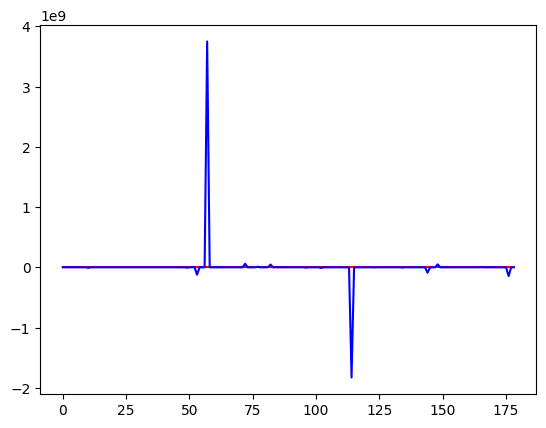

In [ ]:
plt.plot(np.arange(len(y_test)),y_test, color='red')
plt.plot(y_pred, color='blue')
plt.show()